In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import sklearn.cluster
import pandas as pd # para leer datos
import umap


# Base de datos

La base de datos es adaptada de https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE81608 

os islotes de Langerhans o islotes pancreáticos son cúmulos de células que se encargan de producir hormonas como la insulina y el glucagón, con función netamente endocrina. También secretan inmunoglobulinas.

Las sustancias que producen cada una de estas células son:

- Células alfa (α): producen la hormona polipeptídica glucagón.
- Células beta (β): producen las hormonas polipeptídicas insulina y amilina (a una razón de 100:1 respectivamente).
- Células delta (δ): producen el péptido somatostatina.
- Células PP: producen un polipéptido pancreático que inhibe las secreciones exocrinas del páncreas y la motilidad del estómago y del intestino.

Los datos son la expresión (en unidades de RPKM) que se obienen de la secuenciación de ARN de células (Single cell RNA seq) de islotes humanos individuales de pancreas para determinar los transcriptomos de células pancreáticas humanas α-, β-, δ- y PP  en pacientes donantes de organos con o sin  diabetes tipo 2. 

In [19]:
annotation = pd.read_csv('Annotation_Pancreas.csv', index_col = 0)

clase1 = {'cell subtype: beta':1,'cell subtype: alpha':2,
          'cell subtype: delta':3,'cell subtype: PP':4}

Y = [clase1[item] for item in annotation['Sample_characteristics_ch5']] 


In [83]:
# El archivo se descargo de https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE81608&format=file&file=GSE81608%5Fhuman%5Fislets%5Frpkm%2Etxt%2Egz
data = pd.read_csv('GSE81608_human_islets_rpkm.txt.gz',sep = '\t', index_col = 0)
data.head()

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,...,Sample_1591,Sample_1592,Sample_1593,Sample_1594,Sample_1595,Sample_1596,Sample_1597,Sample_1598,Sample_1599,Sample_1600
gene.id,,,,,,,,,,,,,,,,,,,,,
1,47.3396,24.0458,2.2743,0.0,0.0000,0.0,0.0,0.000,0.0,2.0351,...,0.0,0.3304,2.4857,0.0,8.1498,0.0,0.5372,31.1225,0.0000,0.5788
2,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.254,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,47.4664,0.0000
3,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0,130.9796,0.0,0.0,0.000,0.0,79.5905,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
10,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000


In [21]:
annotation.head()

,Sample_title,Sample_geo_accession,Sample_characteristics_ch1,Sample_characteristics_ch2,Sample_characteristics_ch3,Sample_characteristics_ch4,Sample_characteristics_ch5
Sample,,,,,,,
Sample_1,Pancreatic islet cell sample 1,GSM2157899,condition: non-diabetic,age: 23,ethnicity: AA,gender: M,cell subtype: beta
Sample_2,Pancreatic islet cell sample 2,GSM2157900,condition: non-diabetic,age: 23,ethnicity: AA,gender: M,cell subtype: beta
Sample_3,Pancreatic islet cell sample 3,GSM2157901,condition: non-diabetic,age: 23,ethnicity: AA,gender: M,cell subtype: beta
Sample_4,Pancreatic islet cell sample 4,GSM2157902,condition: non-diabetic,age: 23,ethnicity: AA,gender: M,cell subtype: beta
Sample_5,Pancreatic islet cell sample 5,GSM2157903,condition: non-diabetic,age: 23,ethnicity: AA,gender: M,cell subtype: beta


## Filtro de datos
Los datos tienen mas de 39000 genes y aproximadamente el 92% de estos genes no se ha asociado previamente con la función o el crecimiento de las células de los islotes, por lo que pueden corresponder a genes Housekeeping (genes que se expresan en todos los individuos y sirven para controlar funciones basicas) y no a genes relacionados con la diabetes tipo 2, por esto es importante tomar solo los genes que si estan *expresados de manera diferencial*, que en este caso se entiende que son los genes que tienen una desviación estandar alta.

In [30]:
std = np.std(data, axis = 1)
sort_biggest_std = np.argsort(-std)

X = data[sort_biggest_std<7500].T


In [31]:
n_neig = np.array([ 5,  20, 50, 100])
min_dist = np.array([0.0, 0.25, 0.5, 0.8])
metric = ['euclidean', 'manhattan', 'chebyshev']

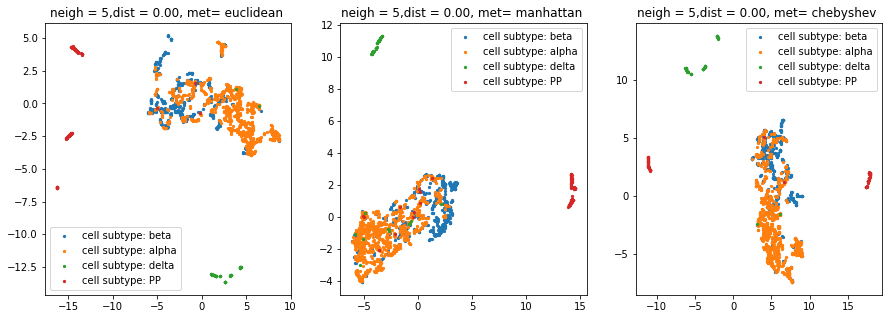

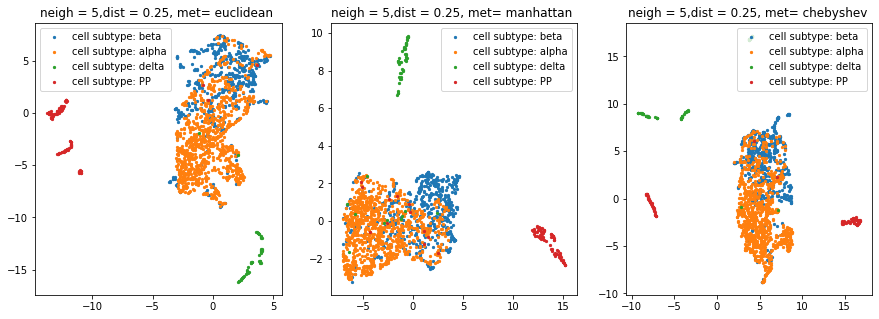

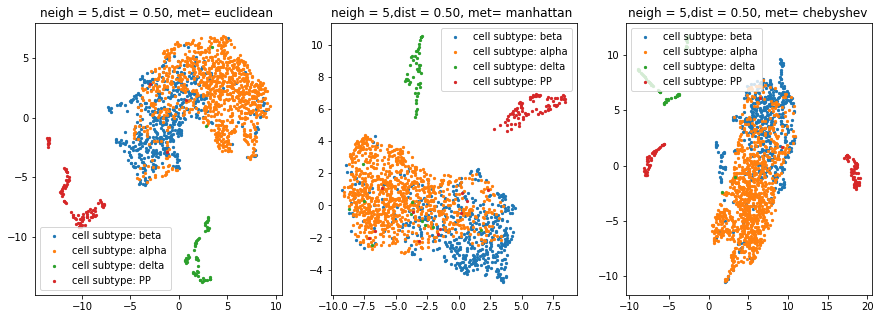

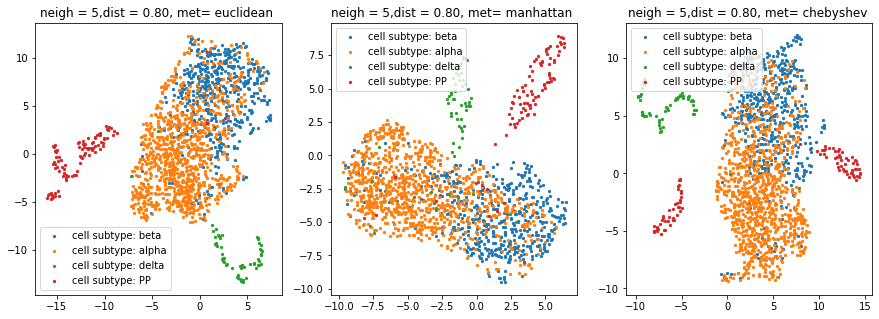

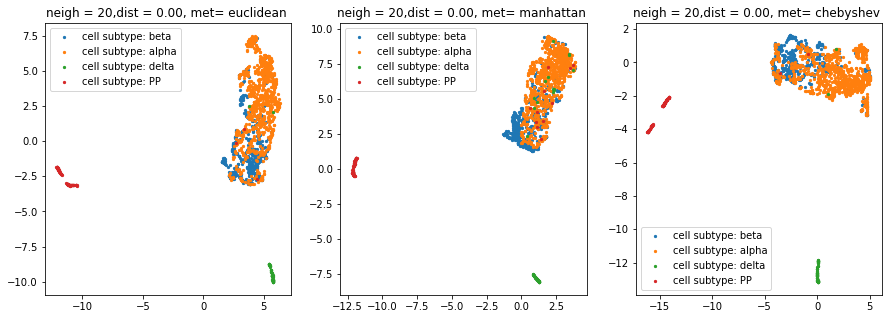

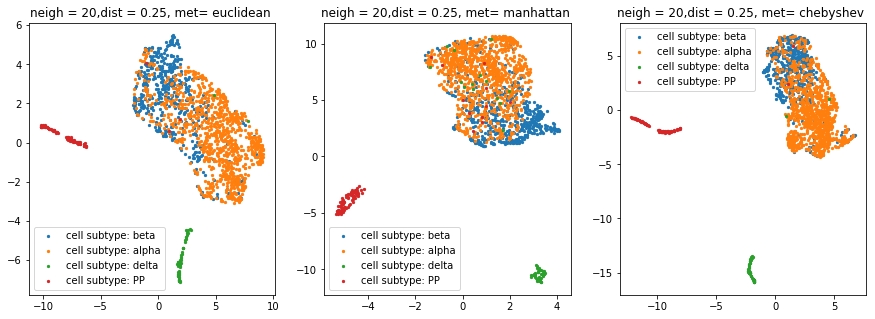

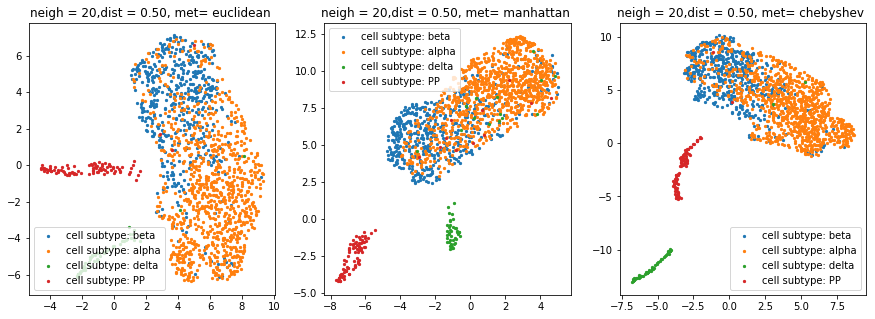

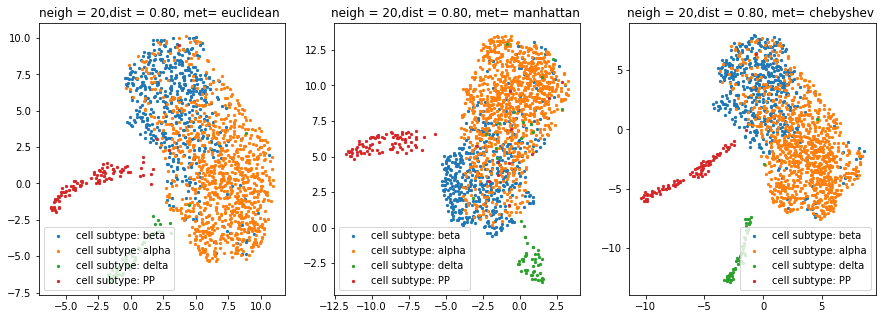

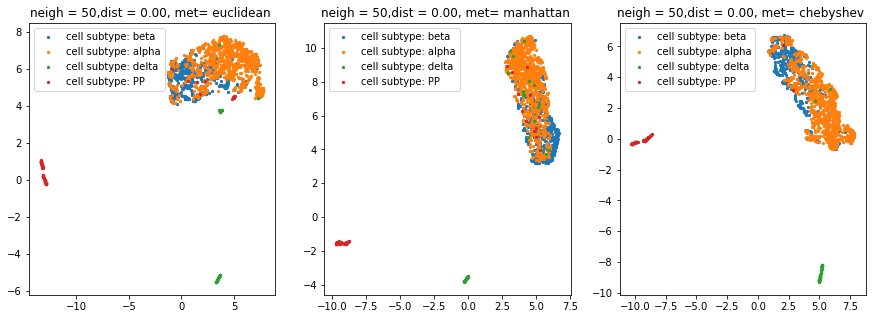

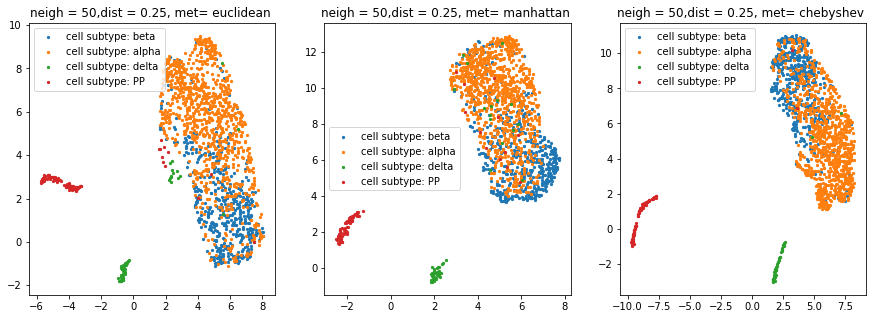

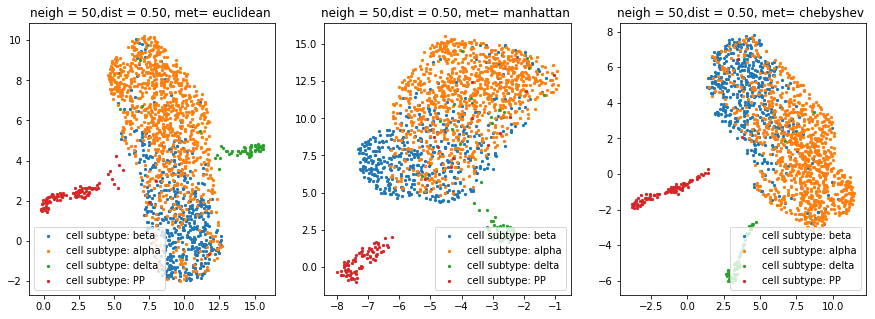

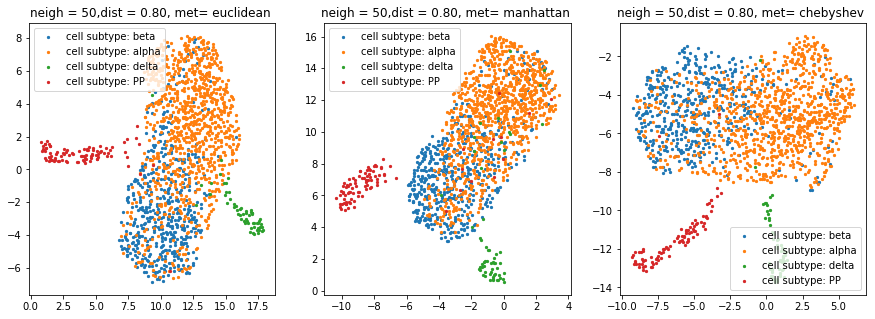

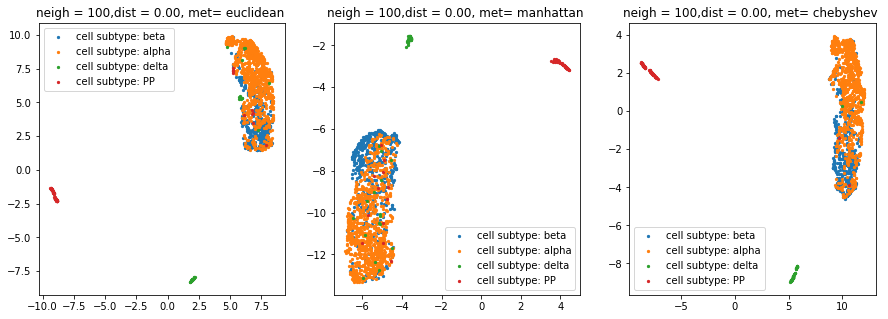

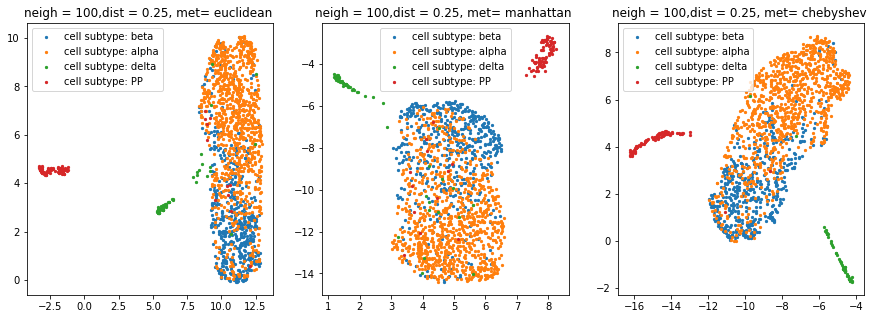

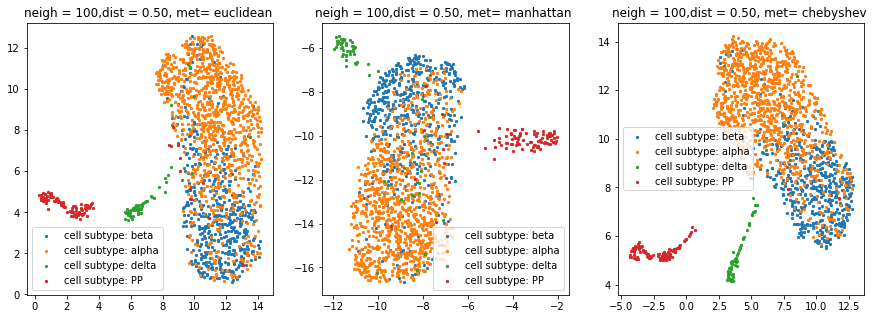

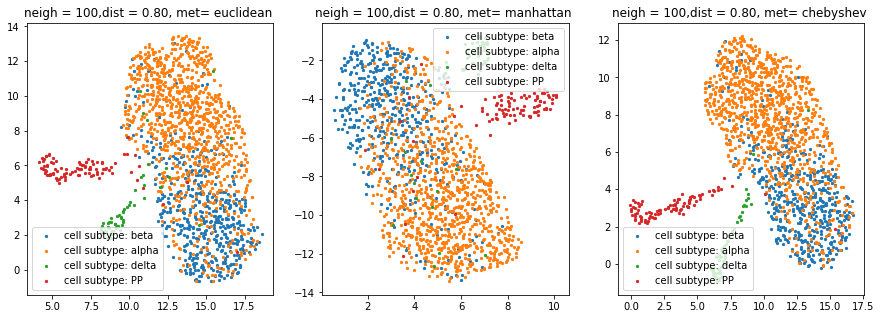

In [33]:
import warnings; warnings.simplefilter('ignore')
for j in n_neig:
    for dist in min_dist:
        plt.figure(figsize=(15, 5))
        for m in range(len(metric)):
                u = umap.UMAP(n_neighbors=j, min_dist =dist, metric = metric[m])
                u.fit(X)
                embedding = u.embedding_

                for i in clase1:
                    key = clase1[i]
                    plt.subplot(1,3,m+1)
                    plt.scatter(embedding[np.where(np.asarray(Y) == key),0], 
                                embedding[np.where(np.asarray(Y) == key),1], label = i, s=5.0)
                plt.title('neigh = %i,dist = %.2f, met= %s '%(j, dist, metric[m]))
                plt.legend()

# Resultados

Es claro que tanto las células δ- como las PP se pueden diferenciar claramente en dos clusters aparte, sin embargo, este resultado no se obtiene con las otras dos células. A medida que el termino min_dist aumenta, los datos se vuelven mas dispersos. Así mismo, aunque el variar el número de vecinos parece no tener cambios muy notorios, a medida que este aumenta, los clusters parecen agruparse mejor, por ejemplo, en la primer imagen y la última imagen (n neig:5, min dist:0 vs  n neig:100, min dist:0) los clusters de las células son mas definidos en esta última. Finalmente, las distancias que se escogieron parecen no alterar los resultados finales, todas terminan teniendo un gran cluster con células α-, β- y otros dos clusters con células δ- y PP

# Clustering

Para hacer clustering se utilizó el resultado con 100 vecinos, distancia mínima de 0.00 y distancia calculada con Chebyshev


In [49]:
u = umap.UMAP(n_neighbors=100, min_dist =0., metric = metric[2])
u.fit(X)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='chebyshev',
     metric_kwds=None, min_dist=0.0, n_components=2, n_epochs=None,
     n_neighbors=100, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

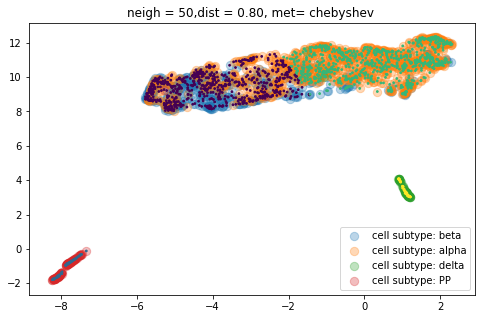

In [81]:
embedding = u.embedding_
n_clusters = 4
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) 
plt.figure(figsize=(8, 5))



for i in clase1:
    key = clase1[i]
    plt.scatter(embedding[np.where(np.asarray(Y) == key),0], 
                embedding[np.where(np.asarray(Y) == key),1], label = i,  s=70.0,alpha = 0.3, edgecolors = None, cmap='Paired')
plt.title('neigh = %i,dist = %.2f, met= %s '%(j, dist, metric[m]))
plt.legend()
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, s=3.0)

Al final, como se suponia, el modelo es bueno para clasificar tanto células delta como céulas PP, pero no para diferenciar células alfa y beta. Una de las razones por las que se da esto es que estas dos últimas células estan físicamente muy cerca, como se muestra en la siguiente imagen: 

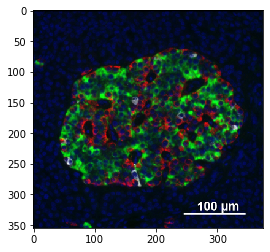

In [58]:
img = plt.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Islote_morfolog%C3%ADa_c%C3%A9lulas_end%C3%B3crinas.png/375px-Islote_morfolog%C3%ADa_c%C3%A9lulas_end%C3%B3crinas.png")
plt.imshow(img)

*Islote pancreático con tinción múltiple mediante Inmunohistoquímica. Glucagón (células alfa en rojo), insulina (células beta en verde), somatostatina (células delta en blanco) y ADN de núcleos (azul).*

El estar cercanas puede significar que las funciones de ambas se relacionen y por tanto, la expresión de sus genes también. De hecho, la insulina es una hormona "Anabólica" por excelencia: permite disponer a las células del aporte necesario de glucosa para los procesos de síntesis con gasto de energía, mientras que el glucagón, al contrario, actúa cuando el nivel de glucosa disminuye y es entonces liberado a la sangre.